In [8]:
import pandas as pd
import seaborn as sns
sns.set()

dataset = pd.read_csv("titanic_train.csv")

In [9]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
dataset.drop("PassengerId", axis=1, inplace=True)
dataset.drop("Name", axis=1, inplace=True)
dataset.drop("Ticket", axis=1, inplace=True)
dataset.drop("Cabin", axis=1, inplace=True)
dataset.drop("Fare", axis=1, inplace=True)

In [11]:
dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


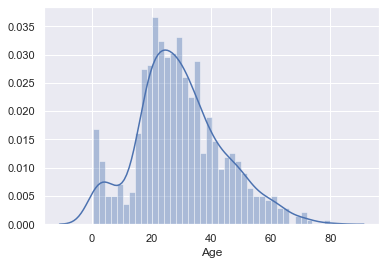

In [12]:
sns.distplot(dataset["Age"].dropna(), bins=40)

In [13]:
def fill(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass ==2:
            return 29
        else:
            return 25
    else:
        return Age

In [14]:
dataset["Age"] = dataset[["Age","Pclass"]].apply(fill, axis=1)

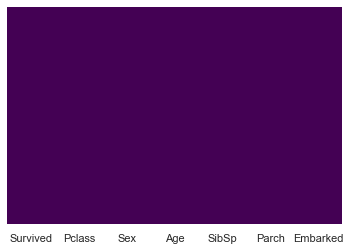

In [16]:
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [17]:
dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [18]:
datacheck = [i for i in dataset.isnull() if i == True]

In [19]:
datacheck

[]

In [20]:
dataset.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False


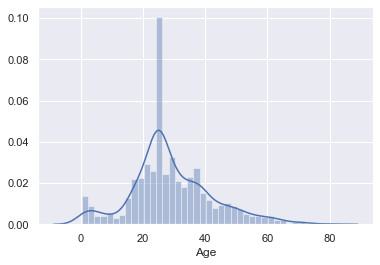

In [21]:
sns.distplot(dataset["Age"].dropna(), bins=40)

In [22]:
dataset.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,25.0,0,0,Q
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C


In [23]:
#In our dataset we can observe that we have some categorical varibles, so we need to apply the concept of one hot
#encoding to make it seperate binary format so that we can create our model

#for categorical varibales we know that we have get_dummies function in pandas so we will be using that

In [32]:
Age = dataset["Age"]
Sex = pd.get_dummies(dataset["Sex"], drop_first=True)
Pclass = pd.get_dummies(dataset["Pclass"], drop_first=True)
SibSp = pd.get_dummies(dataset["SibSp"], drop_first=True)
Parch = pd.get_dummies(dataset["Parch"], drop_first=True)
Embarked = pd.get_dummies(dataset["Embarked"], drop_first=True)

In [33]:
Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [34]:
X = pd.concat([Sex,Pclass, Age, SibSp, Parch, Embarked], axis=1)

In [35]:
X

,male,2,3,Age,1,2,3,4,5,8,1,2,3,4,5,6,Q,S
0,1,0,1,22.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,38.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,35.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,0,27.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,0,0,0,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,0,0,1,25.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
889,1,0,0,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
